In [1]:
import requests
from time import sleep

CLIENT_ID = "nnhQAF0e5cmr4A"
CLIENT_SECRET = "vCAgW6docqOH8a2dlhVEatpF1tk"
USER_AGENT = "Python automatic replybot v2.0 (by /u/GoldenSights )"
USERNAME = "fredyzhang"
PASSWORD = "zhang0926"

def login(username, password):
    headers = {"User-Agent": USER_AGENT}
    client_auth = requests.auth.HTTPBasicAuth(CLIENT_ID, CLIENT_SECRET)
    post_data = {"grant_type": "password", "username": username, "password": password}
    response = requests.post("https://www.reddit.com/api/v1/access_token", auth=client_auth,
            data=post_data, headers=headers)
    return response.json()

token = login(USERNAME, PASSWORD)
print(token)

def worldnews(token):
    subreddit = "worldnews"
    url = "https://oauth.reddit.com/r/{}".format(subreddit)

    headers = {"Authorization": "bearer {}".format(token['access_token']),
            "User-Agent": USER_AGENT}

    response = requests.get(url, headers=headers)
    
    return response.json()

# aresult = worldnews(token)
# for story in result['data']['children']:
#    print(story['data']['title'])

def get_links(subreddit, token, n_pages=5):
    stories = []
    after = None
    for page_number in range(n_pages):
        headers = {"Authorization": "bearer {}".format(token['access_token']),
                "User-Agent": USER_AGENT}
        url = "https://oauth.reddit.com/r/{}?limit=100".format(subreddit)
        if after:
            url += "&after={}".format(after)
        response = requests.get(url, headers=headers)
        result = response.json()
        after = result['data']['after']
        sleep(2)
        stories.extend([(story['data']['title'], story['data']['url'],
            story['data']['score'])
            for story in result['data']['children']])
    return stories

stories = get_links("worldnews", token)


import os
# data_folder = os.path.join(os.path.expanduser("/home/pi/fredy/projects/news_get/"), "Data", "websites", "raw")
data_folder = "Data/websites/raw/"
import hashlib
number_errors = 0
num = 0

for title, url, score in stories:
    output_filename = hashlib.md5(url.encode()).hexdigest()
    fullpath = os.path.join(data_folder, output_filename + ".txt")
    if number_errors > 50:
        print("Too much errors, stop!")
        break
    try:
        response = requests.get(url, timeout=1)
        print("No. ", num, "Url: ", url)
        data = response.text
        num += 1
        with open(fullpath, 'w') as outf:
            outf.write(data)
    except Exception as e:
        number_errors += 1
        print(e)

{'access_token': '494628272641-bJVx1JUjKQZ4e3-4hViEQNRm5os', 'token_type': 'bearer', 'expires_in': 3600, 'scope': '*'}
No.  0 Url:  https://www.reddit.com/live/14d816ty1ylvo/
No.  1 Url:  http://angusreid.org/assault-weapons-ban/
No.  2 Url:  https://www.bbc.co.uk/news/technology-52501453
No.  3 Url:  https://www.cbc.ca/news/politics/trudeau-gun-control-measures-ban-1.5552131
No.  4 Url:  https://www.dw.com/en/thailands-king-living-in-luxury-quarantine-while-his-country-suffers/a-53303644
No.  5 Url:  https://www.newsweek.com/russian-state-television-pushes-conspiracy-theory-bill-gates-behind-coronavirus-pandemic-1501465
No.  6 Url:  https://time.com/5830675/china-australia-coronavirus-inquiry/
No.  7 Url:  https://www.reuters.com/article/us-health-coronavirus-brazil-poor/imported-by-the-rich-coronavirus-now-devastating-brazils-poor-idUSKBN22D549
No.  8 Url:  https://www.theguardian.com/environment/2020/may/01/led-lights-halve-unwanted-fish-in-nets-research-finds
No.  9 Url:  https://f

No.  64 Url:  https://timesofindia.indiatimes.com/world/pakistan/pakistan-awarded-death-penalty-to-584-people-17-for-blasphemy-in-2019/articleshow/75491694.cms
No.  65 Url:  https://www.straitstimes.com/asia/east-asia/hong-kong-braces-for-labour-day-democracy-protests-despite-coronavirus
No.  66 Url:  https://www.theguardian.com/education/2020/may/01/indian-students-trapped-in-uk-by-coronavirus-actually-starving
HTTPSConnectionPool(host='www.sciencealert.com', port=443): Read timed out. (read timeout=1)
No.  67 Url:  https://uk.reuters.com/article/uk-health-coronavirus-britain-fear/britons-fear-leaving-homes-even-if-lockdown-lifted-poll-shows-idUKKBN22D4VS
No.  68 Url:  https://www.pinknews.co.uk/2020/05/01/pope-francis-trans-sex-workers-charity-italy-catholic-church/?utm_source=feedburner&amp;utm_medium=feed&amp;utm_campaign=Feed%3A+Pinknews+%28Pink+News%29
No.  69 Url:  https://www.nytimes.com/2020/05/01/world/asia/kim-jong-un-resurfaces.html?fb_news_token=eyJhbGciOiJIUzI1NiIsInR5cCI

No.  119 Url:  https://news.rthk.hk/rthk/en/component/k2/1523796-20200501.htm
No.  120 Url:  https://www.nytimes.com/2020/05/01/world/americas/brazil-bolsonaro-coronavirus-crisis.html
No.  121 Url:  https://www.newscientist.com/article/2237475-uk-government-hits-100000-tests-target-by-including-unanalysed-tests/
No.  122 Url:  https://wam.ae/en/details/1395302840020
No.  123 Url:  https://www.cyclingweekly.com/news/latest-news/france-offers-each-cyclist-e50-for-bike-repairs-once-lockdown-ends-455140
No.  124 Url:  https://www.ucanews.com/news/pakistan-minister-calls-for-beheading-of-blasphemers/87880
No.  125 Url:  https://www.theguardian.com/uk-news/2020/may/01/foreign-office-blocked-search-for-truth-say-harry-dunn-lawyers
No.  126 Url:  https://www.rnz.co.nz/news/world/415634/russia-reports-record-daily-rise-in-coronavirus-cases-after-pm-s-infection
No.  127 Url:  https://www.newsweek.com/china-steve-bannon-chernobyl-coronavirus-1501410
No.  128 Url:  https://burgeronreport.com/brazi

HTTPSConnectionPool(host='asia.nikkei.com', port=443): Read timed out. (read timeout=1)
No.  183 Url:  https://www.bbc.com/news/science-environment-52489126
No.  184 Url:  https://www.dw.com/en/thailands-king-living-in-luxury-quarantine-while-his-country-suffers/a-53303644
No.  185 Url:  https://www.news.com.au/world/breaking-news/new-zealand-set-for-cannabis-referendum/news-story/0aab0b37b098ecf7b91ba6502161c591
HTTPConnectionPool(host='www.asahi.com', port=80): Read timed out. (read timeout=1)
HTTPSConnectionPool(host='instant.com.pk', port=443): Read timed out. (read timeout=1)
No.  186 Url:  https://www.reuters.com/article/hongkong-protests-mayday/business-booms-for-yellow-firms-backing-hong-kong-protest-movement-idUSL4N2CJ10L
No.  187 Url:  https://www.france24.com/en/20200501-covid-19-after-conflicting-studies-effectiveness-of-remdesivir-still-in-question
No.  188 Url:  https://timesofindia.indiatimes.com/world/uk/who-wants-invite-to-chinas-probe-into-virus-origins/articleshow/75

No.  240 Url:  https://www.scmp.com/news/china/politics/article/3082227/sweden-plans-ask-european-union-investigate-origin-covid-19
No.  241 Url:  https://www.theguardian.com/environment/2020/may/01/covid-19-outbreaks-at-irish-meat-plants-raise-fears-over-worker-safety?CMP=twt_a-environment_b-gdneco
No.  242 Url:  https://www.theglobeandmail.com/canada/article-mps-vote-to-summon-key-who-adviser-after-global-body-refuses-to-let/
No.  243 Url:  https://www.theyucatantimes.com/2020/04/almost-1000-women-murdered-in-mexico-during-first-quarter/
No.  244 Url:  https://www.theguardian.com/business/2020/apr/30/link-climate-pledges-to-26bn-airline-bailout-say-europes-greens-environment
No.  245 Url:  https://www.bbc.com/news/world-asia-52488792
No.  246 Url:  https://www.smh.com.au/world/asia/follow-south-korea-and-add-green-deal-to-virus-recovery-says-guterres-20200501-p54p3z.html
No.  247 Url:  https://www.reuters.com/article/us-health-coronavirus-indonesia-cases/burial-numbers-in-jakarta-ind

HTTPSConnectionPool(host='www.dailymail.co.uk', port=443): Read timed out. (read timeout=1)
No.  298 Url:  https://go4wedding.com/%d9%85%d8%a7-%d9%87%d9%89-%d8%b7%d8%b1%d9%8a%d9%82%d8%a9-%d8%b9%d9%85%d9%84-%d8%a7%d9%84%d8%aa%d9%88%d8%b1%d8%aa%d8%a9-%d9%81%d9%89-%d8%a7%d9%84%d9%85%d9%86%d8%b2%d9%84/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=%25d9%2585%25d8%25a7-%25d9%2587%25d9%2589-%25d8%25b7%25d8%25b1%25d9%258a%25d9%2582%25d8%25a9-%25d8%25b9%25d9%2585%25d9%2584-%25d8%25a7%25d9%2584%25d8%25aa%25d9%2588%25d8%25b1%25d8%25aa%25d8%25a9-%25d9%2581%25d9%2589-%25d8%25a7%25d9%2584%25d9%2585%25d9%2586%25d8%25b2%25d9%2584
No.  299 Url:  https://go4wedding.com/%d8%a7%d8%ad%d8%af%d8%ab-%d8%a7%d9%84%d9%88%d8%a7%d9%86-%d8%b4%d9%82%d9%82-2020/?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=%25d8%25a7%25d8%25ad%25d8%25af%25d8%25ab-%25d8%25a7%25d9%2584%25d9%2588%25d8%25a7%25d9%2586-%25d8%25b4%25d9%2582%25d9%2582-2020
No.  300 Url:  https://go4wedding.com/%d9%85%d8%a7-%d9%87%d9%89-%d8%a3%d8%

HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=1)
No.  342 Url:  https://www.reuters.com/article/us-health-coronavirus-vietnam-fight-insi/after-aggressive-mass-testing-vietnam-says-it-contains-coronavirus-outbreak-idUSKBN22B34H
HTTPSConnectionPool(host='www.bbc.com', port=443): Read timed out. (read timeout=1)
No.  343 Url:  https://www.euronews.com/2020/04/30/coronavirus-vilnius-turns-its-airport-into-a-drive-in-cinema
No.  344 Url:  https://www1.folha.uol.com.br/internacional/en/scienceandhealth/2020/04/brazil-has-the-highest-rate-of-coronavirus-contagion-in-the-world-says-study.shtml?utm_source=newsletter&amp;utm_medium=email&amp;utm_campaign=newsen
No.  345 Url:  https://www.sbs.com.au/news/south-korea-leads-virus-success-in-asia-as-united-states-drug-trial-raises-hope
No.  346 Url:  https://www.france24.com/en/20200501-who-calls-on-africa-to-remain-vigilant-as-some-countries-ease-lockdowns
HTTPSConnectionPool(host='www.ft.com', port=443

No.  387 Url:  https://www.philstar.com/world/2020/05/01/2011114/un-chief-praises-south-koreas-simultaneous-fight-against-virus-climate-change
No.  388 Url:  https://medicalxpress.com/news/2020-04-biases-physically-dirty-people-root.html
No.  389 Url:  https://nypost.com/2020/04/29/kim-jong-uns-sister-has-been-gaining-power-in-north-korea-report/
No.  390 Url:  https://calgaryherald.com/news/like-cargill-workers-concerns-over-safety-at-local-amazon-plant-rise-with-more-covid-19-cases/
No.  391 Url:  https://uk.finance.yahoo.com/news/coronavirus-uk-factory-production-nosedives-at-fastest-pace-in-decades-085014078.html
No.  392 Url:  https://globalnews.ca/news/6858818/coronavirus-china-united-front-canada-protective-equipment-shortage/
No.  393 Url:  https://www.who.int/news-room/detail/01-05-2020-who-and-european-investment-bank-strengthen-efforts-to-combat-covid-19-and-build-resilient-health-systems-to-face-future-pandemics
No.  394 Url:  https://www.scmp.com/week-asia/politics/article

No.  449 Url:  https://www.forbes.com/sites/rachelsandler/2020/04/30/in-effort-to-stop-faulty-goods-china-asks-importers-to-ensure-ppe-meets-standards/#77815f58360b
No.  450 Url:  https://time.com/5830112/russian-prime-minister-coronavirus/


In [12]:
#  Merge the source code
filenames = [os.path.join(data_folder, filename)
            for filename in os.listdir(data_folder)]

os.system("mkdir -p Data/websites/textonly/")

text_output_folder = "Data/websites/textonly/"

from lxml.html import parse, submit_form

skip_node_types = ["script", "head", "style", etree.Comment]

def get_text_from_file(filename):
    with open(filename) as inf:
        html_tree = parse(inf)
    return get_text_from_node(html_tree.getroot())

def get_text_from_node(node):
    if len(node) == 0:
        if node.text and len(node.text) > 100:
            return node.text
        else:
            return " "
    results = (get_text_from_node(child) for child in node 
               if child.tag not in skip_node_types)
    return "\n".join(r for r in results if len(r) > 1)

documents = []
for filename in os.listdir(data_folder):
    text = get_text_from_file(os.path.join(data_folder, filename))
    documents.append(text)
    with open(os.path.join(text_output_folder, filename), "w") as outf:
        outf.write(text)


['And this raises big concerns on a number of fronts, say critics, including Conservative MP Erin O’Toole.\xa0\nChina was evidently hiding the extent of a pandemic that endangered the world while covertly securing PPE at low prices. This “surreptitious” operation left “the world naked with no supply of PPE,” Jorge Guajardo, Mexico’s former ambassador to Beijing, told Global News.\xa0\nThe result: starting in March, after COVID-19 had circled the globe, countries that provided masks to China in January and February were forced to compete for China’s supply.\nBy late January, sources in manufacturing and military circles were warning western governments that China seemed to be covertly seizing global PPE supply, O’Toole and Guajardo said.\n“One source told me in January it became well-known amongst military and emergency services that China was stockpiling masks and basically buying out as many quantities as it could,” he said in an interview with Global News. “And we know, … that senior

In [13]:
###
###  Generate the documents variables.
###

documents




['And this raises big concerns on a number of fronts, say critics, including Conservative MP Erin O’Toole.\xa0\nChina was evidently hiding the extent of a pandemic that endangered the world while covertly securing PPE at low prices. This “surreptitious” operation left “the world naked with no supply of PPE,” Jorge Guajardo, Mexico’s former ambassador to Beijing, told Global News.\xa0\nThe result: starting in March, after COVID-19 had circled the globe, countries that provided masks to China in January and February were forced to compete for China’s supply.\nBy late January, sources in manufacturing and military circles were warning western governments that China seemed to be covertly seizing global PPE supply, O’Toole and Guajardo said.\n“One source told me in January it became well-known amongst military and emergency services that China was stockpiling masks and basically buying out as many quantities as it could,” he said in an interview with Global News. “And we know, … that senior

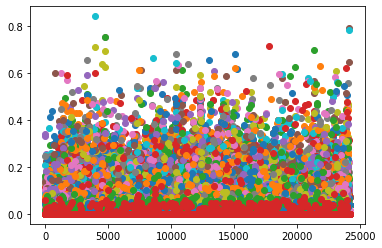

In [49]:
####
####   k-means  
####

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# tv = TfidfVectorizer(max_df = 0.4)
# tv_fit = tv.fit_transform(documents)
# for nu in range(len(tv_fit.A)):
#     plt.scatter(np.arange(len(tv_fit.A[nu])), tv_fit.A[nu])


n_clusters = 6
pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),   # ignore the rate of words appear more than 40%
                    ('clusterer', KMeans(n_clusters=n_clusters))
                    ])

pipeline.fit(documents)
labels = pipeline.predict(documents)   # labels have no meaning itself.

from collections import Counter
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number,
                                                 c[cluster_number]))

terms = pipeline.named_steps['feature_extraction'].get_feature_names()
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number,
                                                 c[cluster_number]))
    print(" Most Important terms")
    centroid = pipeline.named_steps['clusterer'].cluster_centers_[cluster_number]
    most_important = centroid.argsort()
    for i in range(5):
        term_index = most_important[-(i+1)]
        print("   {0} )  {1}  (score:   {2:.4f})".format(i+1, terms[term_index], centroid[term_index]))

#####
####   draw the heat map dor the data
#####


# from scipy.sparse import csr_matrix
# import numpy as np

# def create_coassociation_matrix(labels):
#     rows = []
#     cols = []
#     unique_labels = set(labels)
#     for label in unique_labels:
#         indices = np.where(labels == label)[0]
#         for index1 in indices:
#             for index2 in indices:
#                 rows.append(index1)
#                 cols.append(index2)
#     data = np.ones((len(rows), ))
#     return csr_matrix((data, (rows, cols)),   dtype='float')

# C = create_coassociation_matrix(labels)


# from scipy.sparse.csgraph import minimum_spanning_tree

# mst = minimum_spanning_tree(-C)
# pipeline.fit(documents)

# labels2 = pipeline.predict(documents)
# C2 = create_coassociation_matrix(labels2)
# C_sum = (C+C2)  / 2

# mst  = minimum_spanning_tree(-C_sum)
# mst.data[mst.data > -1] = 0



# from scipy.sparse.csgraph import connected_components
# number_of_clusters, labels = connected_components(mst)

# from sklearn.base import BaseEstimator, ClusterMixin

# class EAC(BaseEstimator, ClusterMixin):
#     def __init__(self, n_clusterings = 10, cut_threshold = 0.5, n_clusters_range = (3, 10)):
#         self.n_clusterings = n_clusterings
#         self.cut_threshold = cut_threshold
#         self.n_clusters_range = n_clusters_range
    
#     def fit(self, X, y=None):  ## 共斜矩阵  MST 最小生成树， 消除一些 低于thershold的 value
#         C = sum( ( create_coassociation_matrix(self._single_clustering(X))
#                  for i in range(self.n_clusterings)))
#         mst = minimum_spanning_tree(-C)
#         mst.data[mst.data > -self.cut_threshold] = 0
#         self.n_components, self.labels_ = connected_components(mst)
#         return self
    
#     def _single_clustering(self, X):
#         import numpy as np
#         n_clusters = np.randomom.randint(*self.n_clusters_range)
#         km = KMeans(n_clusters=n_clusters)
#         return km.fit_predict(X)
    
# pipeline = Pipeline( [ ('feature_extraction', TfidfVectorizer(max_df=0.4)), 
#                      ('clusterer', EAC())
#                      ])

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin

class EAC(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusterings = 10, cut_threshold = 0.5, n_clusters_range = (3, 10)):
        self.n_clusterings = n_clusterings
        self.cut_threshold = cut_threshold
        self.n_clusters_range = n_clusters_range
    
    def fit(self, X, y=None):
        C = sum( ( create_coassociation_matrix(self._single_clustering(X))
                 for i in range(self.n_clusterings)))
        mst = minimum_spanning_tree(-C)
        mst.data[mst.data > -self.cut_threshold] = 0
        self.n_components, self.labels_ = 